# Code Assignment 16 — K-Means Clustering (Mall Customers, 2–3 Features Only)

**Format:** Instructor Guidance → Your Task (step-by-step) → We Share (reflection)

**Goal:** Build a **K-Means** clustering model using **only 2–3 simple numeric features** with **minimal cleaning**, pick **K** via **Elbow + Silhouette** on the **train split**, and sanity-check **generalization** on the **test split**. Then profile clusters in plain business terms.

**Dataset (simple, non-transportation):** *Mall Customers* (public, widely used teaching dataset)  

> We will only use **2–3 numeric columns**: e.g., `Age`, `Annual Income (k$)`, `Spending Score (1-100)`.  



## Instructor Guidance (Pseudocode + Docs)

**Docs:**  
- `train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
- `StandardScaler`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
- `KMeans`: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  
- `silhouette_score`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

### Pseudocode Plan (Minimal)
1) **Load CSV** → preview columns/shape.  
2) **Pick 2–3 numeric features** (e.g., Age, Income, SpendingScore).  
3) **Drop NA only** on those columns.  
4) **Split**: `train_test_split(X, test_size=0.2, random_state=42)`.  
5) **Scale**: `StandardScaler` — **fit on TRAIN**, transform TRAIN and TEST.  
6) **Choose K** on TRAIN: loop K=2..8 → plot **Elbow (inertia)** and **Silhouette**.  
7) **Fit final KMeans** on TRAIN with your chosen K; predict TRAIN & TEST labels.  
8) **Sanity check**: report **Silhouette (TRAIN vs TEST)**.  
9) **Profile clusters**: per-cluster means of your 2–3 features (no extra cleaning).  
10) **Reflection**: justify K, describe segments, suggest one action per segment.


## Your Task — Step-by-Step
Work in pairs. Keep code minimal. Use only 2–3 features.

### 1) Imports & Settings

In [77]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

### 2) Load the Mall Customers CSV & Preview

In [78]:
path = '../data/Mall_Customers.csv'
df = pd.read_csv(path)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [79]:
print('------------NA Count----------------')
display(df.isna().sum())

print('------------Value Counts----------------')
display(df.value_counts(ascending=False))

------------NA Count----------------


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

------------Value Counts----------------


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Name: count, Length: 200, dtype: int64

In [80]:
display(df['Spending Score (1-100)'].value_counts())
display(df['Annual Income (k$)'].value_counts())

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

<Axes: xlabel='Gender', ylabel='CustomerID'>

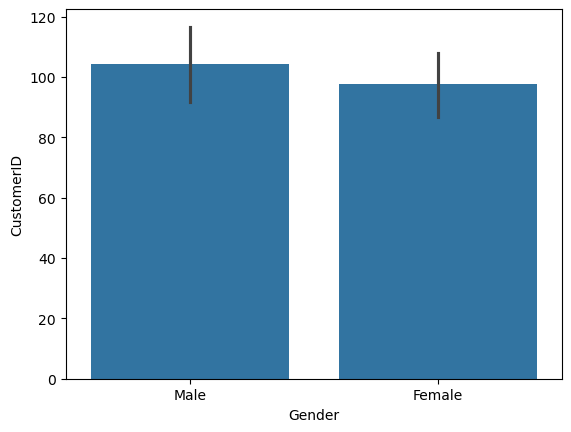

In [81]:
sns.barplot(df, x='Gender', y='CustomerID')

<Axes: xlabel='Annual Income (k$)', ylabel='CustomerID'>

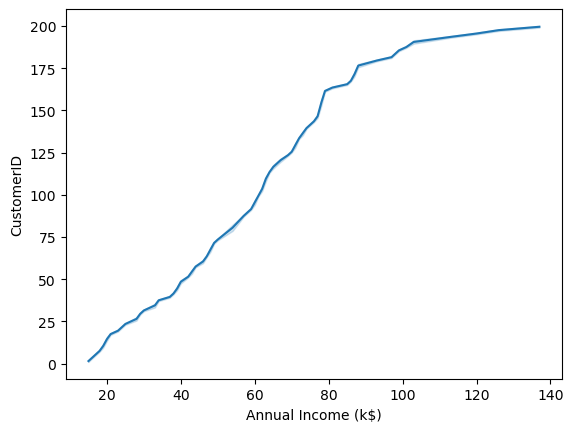

In [82]:
sns.lineplot(df, x='Annual Income (k$)', y='CustomerID')

### 3) Select **2–3 Numeric Features** (no heavy cleaning)
Choose from:
- `Age`
- `Annual Income (k$)`
- `Spending Score (1-100)`

> Keep it simple: e.g., use **Age + Spending Score** (2D) or **Age + Income + Spending Score** (3D).


In [83]:
df_filtered = df[['Annual Income (k$)', 'Spending Score (1-100)']]

(df_filtered == 0).value_counts()

Annual Income (k$)  Spending Score (1-100)
False               False                     200
Name: count, dtype: int64

### 4) Train–Test Split (for model generalization sanity check)

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=30)

### 5) Scale (fit on TRAIN only), then Explore K on TRAIN (Elbow + Silhouette)

In [85]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(x_train)

### 6) Choose **K** (justify), Fit Final Model on TRAIN, Check Stability on TEST
- Report **Silhouette TRAIN vs TEST** (higher is better; similar values suggest stability).

In [90]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(xtrain_scaled)

cluster_labels = kmeans.labels_

### 7) Profile Clusters (Business-Readable)
- Use the **original (unscaled)** features for interpretation.
- Show per-cluster means of your **2–3 features**.

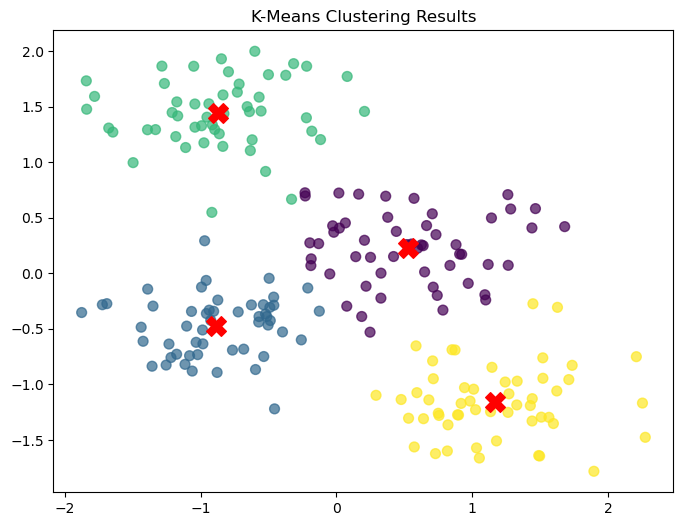

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(xtrain_scaled[:, 0], xtrain_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
# Plot the centroids (the cluster centers) as red 'X's
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('K-Means Clustering Results')
plt.show()

## We Share — Reflection (2 short paragraphs)

1) **K choice & stability:** What **K** did you choose and why (Elbow bend, Silhouette peak/plateau, simplicity)? Report **Silhouette (TRAIN vs TEST)** — did structure persist, or did it collapse on test?  
2) **Segments & actions:** Give short names to your segments (e.g., “Young High-Spend,” “Mid-Age Value-Seeker,” “Older Low-Spend”) and suggest **one actionable idea** for each (targeted offers, product mix, messaging).

> Bonus: Re-run with **just 2 features** (e.g., **Income + SpendingScore**) and compare stability & interpretability.


I went with K = 4. THe data points visually seem to cluster well without much overlap.

***

# Code-Along for reference

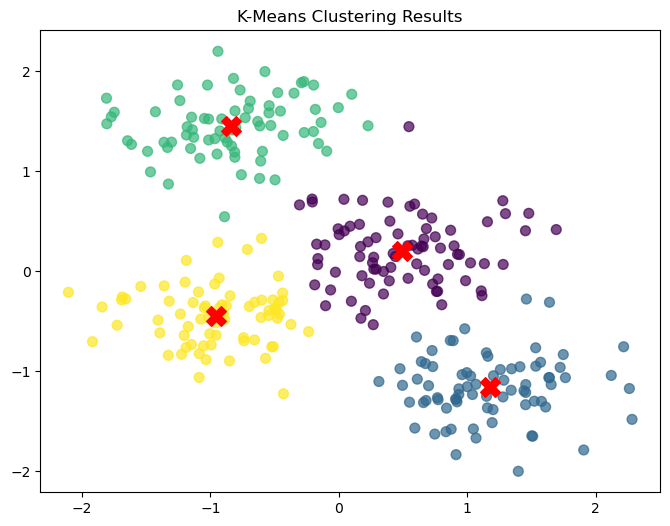

In [76]:
# Generate sample data for clustering
# X contains the features, y contains the "true" labels (which we won't use)
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
X_df = pd.DataFrame(X, columns=['feature1', 'feature2'])

# CRITICAL STEP: Scale the data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Initialize and fit K-Means (we choose K=4)
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X_scaled)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
# Plot the centroids (the cluster centers) as red 'X's
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('K-Means Clustering Results')
plt.show()